<a href="https://colab.research.google.com/github/LadySoto/Challenge_TelecomX_Latam/blob/main/Challenge_TelecomX_Latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Challenge Telecom X**

##📌 **Extracción**

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import requests

In [150]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)

df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


##🔧 **Transformación**

In [151]:
df_normalizado = pd.json_normalize(data)
df_normalizado

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


### **Diccionario de datos**



* customerID: número de identificación único de cada cliente
* Churn: si el cliente dejó o no la empresa
* gender: género (masculino y femenino)
* SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
* Partner: si el cliente tiene o no una pareja
* Dependents: si el cliente tiene o no dependientes
* tenure: meses de contrato del cliente
* PhoneService: suscripción al servicio telefónico
* MultipleLines: suscripción a más de una línea telefónica
* InternetService: suscripción a un proveedor de internet
* OnlineSecurity: suscripción adicional de seguridad en línea
* OnlineBackup: suscripción adicional de respaldo en línea
* DeviceProtection: suscripción adicional de protección del dispositivo
* TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
* StreamingTV: suscripción de televisión por cable
* StreamingMovies: suscripción de streaming de películas
* Contract: tipo de contrato
* PaperlessBilling: si el cliente prefiere recibir la factura en línea
* PaymentMethod: forma de pago
* Charges.Monthly: total de todos los servicios del cliente por mes
* Charges.Total: total gastado por el cliente

### **Limpieza de Datos:**

#### 1. Revisar estructura del Data Frame

In [152]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

#### 2. Revisar valores nulos

In [153]:
df_normalizado.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


#### 3. Convertir el tipo de dato de las columnas al correcto

In [154]:
df_normalizado['account.Charges.Total'] = pd.to_numeric(df_normalizado['account.Charges.Total'], errors='coerce')

In [155]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [156]:
valores_invalidos = [' ', '', 'NaN', 'nan', 'None', 'null']
df_normalizado['Churn'] = df_normalizado['Churn'].replace(valores_invalidos, np.nan)

df_normalizado['Churn'] = df_normalizado['Churn'].replace({'Yes':1, 'No':0}).astype('boolean')
df_normalizado['Churn']

/tmp/ipython-input-1798036348.py:4: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Churn
0,False
1,False
2,True
3,True
4,True
...,...
7262,False
7263,True
7264,False
7265,False


In [157]:
df_normalizado['customer.SeniorCitizen'] = df_normalizado['customer.SeniorCitizen'].astype('boolean')
df_normalizado['customer.SeniorCitizen']

,customer.SeniorCitizen
0,False
1,False
2,False
3,True
4,True
...,...
7262,False
7263,False
7264,False
7265,False


In [158]:
valores_invalidos = [' ', '', 'NaN', 'nan', 'None', 'null']
df_normalizado['customer.Partner'] = df_normalizado['customer.Partner'].replace(valores_invalidos, np.nan)

df_normalizado['customer.Partner'] = df_normalizado['customer.Partner'].replace({'Yes':1, 'No':0}).astype('boolean')
df_normalizado['customer.Partner']

/tmp/ipython-input-1517414511.py:4: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,customer.Partner
0,True
1,False
2,False
3,True
4,True
...,...
7262,False
7263,True
7264,False
7265,True


In [159]:
valores_invalidos = [' ', '', 'NaN', 'nan', 'None', 'null']
df_normalizado['customer.Dependents'] = df_normalizado['customer.Dependents'].replace(valores_invalidos, np.nan)

df_normalizado['customer.Dependents'] = df_normalizado['customer.Dependents'].replace({'Yes':1, 'No':0}).astype('boolean')
df_normalizado['customer.Dependents']

/tmp/ipython-input-1689287704.py:4: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,customer.Dependents
0,True
1,False
2,False
3,False
4,False
...,...
7262,False
7263,False
7264,False
7265,True


In [160]:
valores_invalidos = [' ', '', 'NaN', 'nan', 'None', 'null']
df_normalizado['phone.PhoneService'] = df_normalizado['phone.PhoneService'].replace(valores_invalidos, np.nan)

df_normalizado['phone.PhoneService'] = df_normalizado['phone.PhoneService'].replace({'Yes':1, 'No':0}).astype('boolean')
df_normalizado['phone.PhoneService']

/tmp/ipython-input-2392787489.py:4: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,phone.PhoneService
0,True
1,True
2,True
3,True
4,True
...,...
7262,True
7263,True
7264,True
7265,True


In [161]:

df_normalizado['account.PaperlessBilling'] = df_normalizado['account.PaperlessBilling'].replace({'Yes':1, 'No':0}).astype('boolean')
df_normalizado['account.PaperlessBilling']

/tmp/ipython-input-3211477016.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,account.PaperlessBilling
0,True
1,False
2,True
3,True
4,True
...,...
7262,False
7263,True
7264,True
7265,False


In [162]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   boolean
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   boolean
 4   customer.Partner           7267 non-null   boolean
 5   customer.Dependents        7267 non-null   boolean
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   boolean
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

#### 4. Revisar valores nulos nuevamente tratarlos

In [163]:
df_normalizado.isnull().sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [164]:
df_normalizado['account.Charges.Total'].fillna(df_normalizado['account.Charges.Total'].median(), inplace=True)

/tmp/ipython-input-23078943.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [165]:
df_normalizado.isnull().sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


#### 5. Asegurar consistencia en las columna categoricas

In [166]:
columnas = ['customerID',
            'Churn',
            'customer.SeniorCitizen' ,
            'customer.Partner',
            'customer.Dependents',
            'customer.tenure',
            'phone.PhoneService',
            'customer.gender',
            'phone.MultipleLines',
            'internet.InternetService',
            'internet.OnlineSecurity',
            'internet.OnlineBackup',
            'internet.DeviceProtection',
            'internet.TechSupport',
            'internet.StreamingTV',
            'internet.StreamingMovies',
            'account.Contract',
            'account.PaperlessBilling',
            'account.PaymentMethod']
columnas

['customerID',
 'Churn',
 'customer.SeniorCitizen',
 'customer.Partner',
 'customer.Dependents',
 'customer.tenure',
 'phone.PhoneService',
 'customer.gender',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod']

In [167]:
def verificar_columnas(columnas):

  for i in columnas:
      print(f'🔍 Columna: {i}')
      print(df_normalizado[i].value_counts(dropna=False))

      valores_sospechosos = df_normalizado[i].isin(['', ' ', 'NaN', 'nan', 'None', 'null']).sum()
      if valores_sospechosos > 0:
          print(f'⚠️ Valores sospechosos: {valores_sospechosos}')

      print('---')

verificar_columnas(columnas)

🔍 Columna: customerID
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64
---
🔍 Columna: Churn
Churn
False    5174
True     1869
<NA>      224
Name: count, dtype: Int64
---
🔍 Columna: customer.SeniorCitizen
customer.SeniorCitizen
False    6085
True     1182
Name: count, dtype: Int64
---
🔍 Columna: customer.Partner
customer.Partner
False    3749
True     3518
Name: count, dtype: Int64
---
🔍 Columna: customer.Dependents
customer.Dependents
False    5086
True     2181
Name: count, dtype: Int64
---
🔍 Columna: customer.tenure
customer.tenure
1     634
72    369
2     246
3     207
4     185
     ... 
28     60
39     59
44     54
36     50
0      11
Name: count, Length: 73, dtype: int64
---
🔍 Columna: phone.PhoneService
phone.PhoneService
True     6560
False     707
Name: count, dtype: Int64
---
🔍 Columna: customer.gen

In [168]:
df_normalizado.dropna(subset=['Churn'], inplace=True)

In [169]:
verificar_columnas(columnas)

🔍 Columna: customerID
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7043, dtype: int64
---
🔍 Columna: Churn
Churn
False    5174
True     1869
Name: count, dtype: Int64
---
🔍 Columna: customer.SeniorCitizen
customer.SeniorCitizen
False    5901
True     1142
Name: count, dtype: Int64
---
🔍 Columna: customer.Partner
customer.Partner
False    3641
True     3402
Name: count, dtype: Int64
---
🔍 Columna: customer.Dependents
customer.Dependents
False    4933
True     2110
Name: count, dtype: Int64
---
🔍 Columna: customer.tenure
customer.tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
---
🔍 Columna: phone.PhoneService
phone.PhoneService
True     6361
False     682
Name: count, dtype: Int64
---
🔍 Columna: customer.gender
customer.g

##📊 **Carga y análisis**

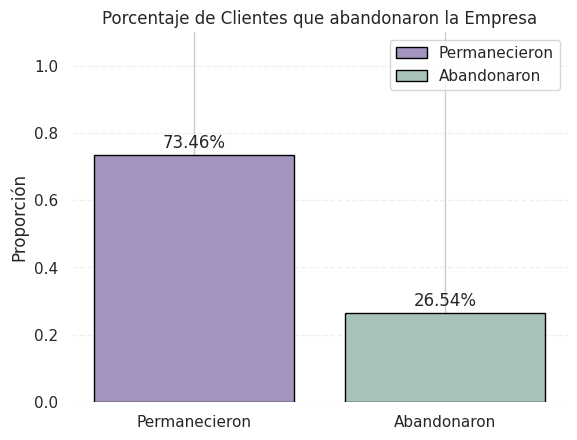

In [170]:
proporciones = df_normalizado['Churn'].value_counts(normalize=True)

fig, ax = plt.subplots()

ax.bar(0, proporciones[False], color='#A393BF', edgecolor='black', label='Permanecieron')
ax.bar(1, proporciones[True], color='#A8C3BC', edgecolor='black', label='Abandonaron')

ax.set_xticks([0, 1])
ax.set_xticklabels(['Permanecieron', 'Abandonaron'])

ax.set_ylabel('Proporción')

ax.text(0, proporciones[False] + 0.02, f"{proporciones[False]*100:.2f}%", ha='center', fontsize=12)
ax.text(1, proporciones[True] + 0.02, f"{proporciones[True]*100:.2f}%", ha='center', fontsize=12)

ax.set_title('Porcentaje de Clientes que abandonaron la Empresa')
ax.set_ylim(0, 1.1)
ax.legend()

for spine in ax.spines.values():
    spine.set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()


In [171]:
color_discrete_map = {
    False: '#A393BF',  # Permanecieron
    True: '#A8C3BC'    # Abandonaron
}


In [172]:
def grafico_churn_plotly(df, columna_categorica):

    fig = px.histogram(
        df,
        x=columna_categorica,
        color='Churn',
        barmode='group',
        text_auto=True,
        color_discrete_map={
            False: '#A393BF',  # Permanecieron
            True: '#A8C3BC'    # Abandonaron
        }
    )

    # Personalización de título y ejes
    fig.update_layout(
        title=f'Clientes que Permanecieron vs Abandonaron según {columna_categorica}',
        xaxis_title=columna_categorica,
        yaxis_title='Cantidad de Clientes',
        legend_title='Estado del Cliente',
        bargap=0.15
    )

    fig.for_each_trace(
        lambda t: t.update(name='Permanecieron' if t.name == 'False' else 'Abandonaron')
    )

    fig.show()


In [173]:
grafico_churn_plotly(df_normalizado, 'customer.gender')
grafico_churn_plotly(df_normalizado, 'customer.SeniorCitizen')
grafico_churn_plotly(df_normalizado, 'customer.tenure')
grafico_churn_plotly(df_normalizado, 'phone.PhoneService')
grafico_churn_plotly(df_normalizado, 'internet.InternetService')
grafico_churn_plotly(df_normalizado, 'internet.StreamingTV')
grafico_churn_plotly(df_normalizado, 'internet.StreamingMovies')
grafico_churn_plotly(df_normalizado, 'account.Contract')
grafico_churn_plotly(df_normalizado, 'account.PaymentMethod')

In [174]:
df_grouped = df_normalizado.groupby(['customer.tenure', 'Churn']).size().unstack(fill_value=0)

df_grouped['churn_rate'] = (df_grouped.get(True, 0) / df_grouped.sum(axis=1)) * 100

df_grouped_reset = df_grouped.reset_index()

fig = px.line(
    df_grouped_reset,
    x='customer.tenure',
    y='churn_rate',
    title='📉 Porcentaje de Abandono de los Clientes (%) según Meses de Contrato',
    markers=True,
    labels={
        'customer.tenure': 'Meses como cliente',
        'churn_rate': 'Porcentaje de Abandono (%)'
    }
)

fig.update_traces(line_color='#A8C3BC', marker_color='#A8C3BC')
fig.update_layout(
    yaxis_range=[0, 100],
    title_font_size=18,
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray')
)

fig.show()


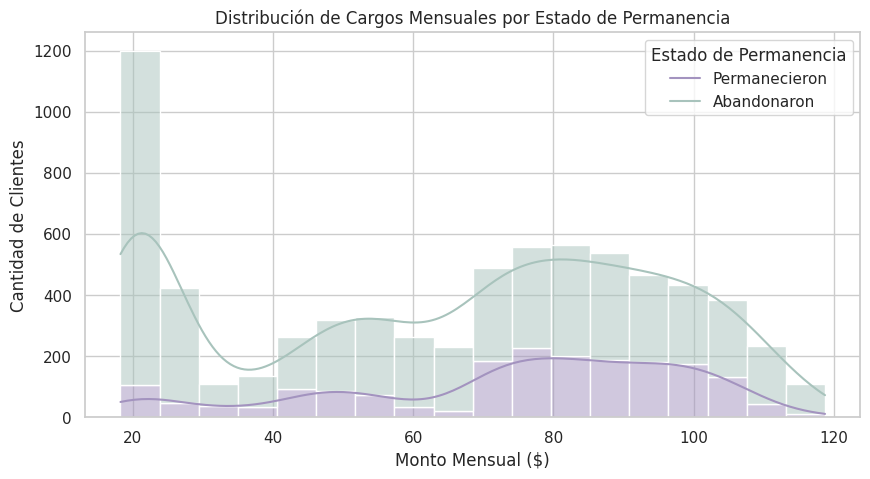

In [175]:
colores = {True: '#A393BF', False: '#A8C3BC'}

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(
    data=df_normalizado,
    x='account.Charges.Monthly',
    kde=True,
    hue='Churn',
    multiple='stack',
    palette=colores
)
plt.title('Distribución de Cargos Mensuales por Estado de Permanencia')
plt.xlabel('Monto Mensual ($)')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Estado de Permanencia', labels=['Permanecieron', 'Abandonaron'])
plt.show()

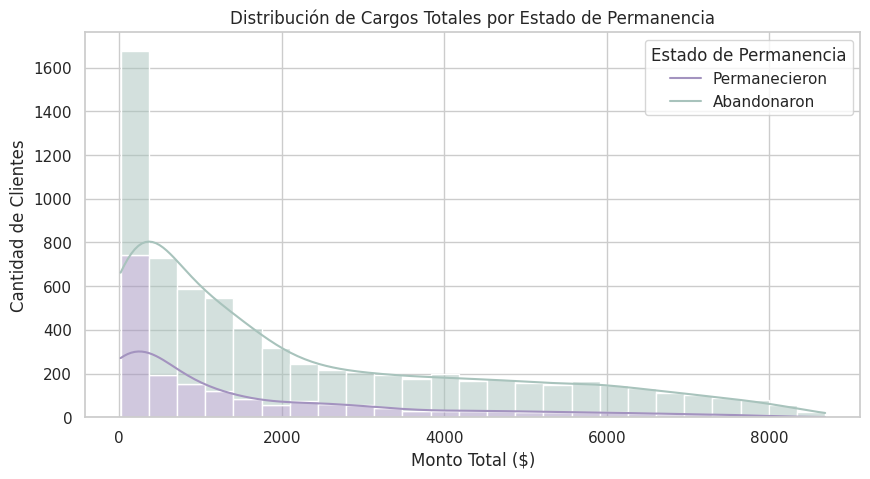

In [176]:
plt.figure(figsize=(10, 5))
sns.histplot(
    data=df_normalizado,
    x='account.Charges.Total',
    kde=True,
    hue='Churn',
    multiple='stack',
    palette=colores
)
plt.title('Distribución de Cargos Totales por Estado de Permanencia')
plt.xlabel('Monto Total ($)')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Estado de Permanencia', labels=['Permanecieron', 'Abandonaron'])
plt.show()

##📄**Informe final**

### 📊 **Análisis de Evasión de Clientes – Telecom X**


#### 🧠 **Objetivo del Proyecto**

Este análisis tiene como propósito identificar los factores que inciden en la evasión (churn) de clientes en la empresa Telecom X.

####📌 **Insights**

A continuación se detallan los hallazgos clave obtenidos al comparar la variable objetivo `Churn` con otras variables demográficas y de servicio:

**1. Género del Cliente:**

📌 `Insight:` El género no influye significativamente en la evasión. La tasa de churn es muy similar entre hombres y mujeres.

**2. Edad Mayor de 65 Años:**

📌 `Insight:` Los clientes mayores de 65 años tienden a abandonar con mayor frecuencia. Esto puede estar relacionado con menos afinidad hacia servicios digitales.

**3. Tiempo como Cliente:**

📌 `Insight:` La mayoría de los abandonos ocurre en los primeros 6 meses. Después de este período, la tasa de churn disminuye considerablemente.

**4. Servicio Telefónico:**

📌 `Insight:` Los clientes que no tienen servicio telefónico presentan tasas de abandono más altas, lo cual puede reflejar bajo compromiso con los servicios de la empresa.

**5. Tipo de Internet:**

📌 `Insight:` Los usuarios con fibra óptica muestran mayores tasas de churn, posiblemente debido a cargos más elevados. Quienes no tienen servicio de internet rara vez abandonan (aunque representan una minoría).

**6. Servicios de Streaming:**

📌 `Insight:` Los clientes con servicios adicionales como `StreamingTV` o `StreamingMovies` tienen una tasa de permanencia mayor, lo que sugiere que estos servicios fomentan la fidelización.

**7. Tipo de Contrato:**

📌 `Insight:` El tipo de contrato es un factor determinante. Los clientes con contrato mensual abandonan mucho más que aquellos con contrato anual o bianual.

**8. Método de Pago:**

📌 `Insight:` El uso de métodos automáticos de pago se relaciona con menor tasa de churn. Métodos tradicionales como cheque presentan más evasión.


#### 🧩 **Recomendaciones Estratégicas**

Con base en los hallazgos anteriores, se proponen las siguientes acciones para reducir la evasión de clientes:



- Implementar estrategias de retención focalizadas en los **primeros 6 meses** del cliente.
- Incentivar la contratación de **servicios adicionales** (streaming, protección, soporte).
- Promover **contratos a largo plazo** mediante descuentos o beneficios exclusivos.
- Fomentar el uso de **métodos de pago automáticos** para facilitar la continuidad del servicio.
- Diseñar campañas específicas para **clientes mayores de 65 años**, con acompañamiento y canales preferenciales.
